In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\Selva Kumar E\\Desktop'

In [5]:
df=pd.read_csv("Social_Network_Ads.csv")

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.shape

(400, 5)

In [14]:
df.drop(columns=["User ID"],inplace=True,axis=1)

In [15]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [17]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
df['Gender'].value_countscounts()

Female    204
Male      196
Name: Gender, dtype: int64

In [21]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

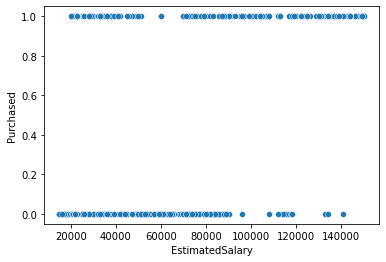

In [22]:
sns.scatterplot(df["EstimatedSalary"],df["Purchased"])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

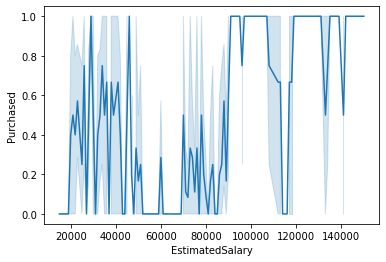

In [23]:
sns.lineplot(df["EstimatedSalary"],df["Purchased"])

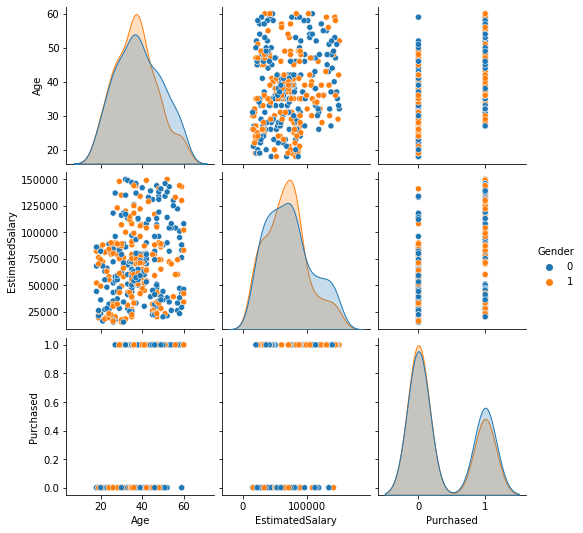

In [24]:
sns.pairplot(df,hue="Gender")

In [25]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

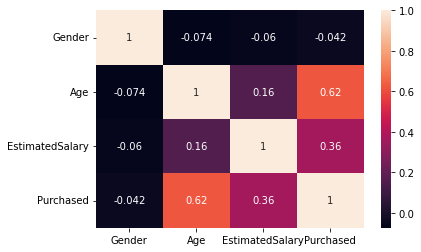

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
df.corr().Purchased.sort_values()

Gender            -0.042469
EstimatedSalary    0.362083
Age                0.622454
Purchased          1.000000
Name: Purchased, dtype: float64

In [28]:
x=df.drop("Purchased",axis=1)

In [29]:
y=df["Purchased"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
### initia;ize ;logistic regression
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
test_pred = lr.predict(x_test)

In [37]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [39]:
print("Accuracy score:",accuracy_score(y_test,test_pred))

Accuracy score: 0.65


In [40]:
print(confusion_matrix(y_test,test_pred))

[[52  0]
 [28  0]]
